In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [2]:

# Load your dataset
df = pd.read_csv(r"C:\Users\71591\Desktop\dataset\Tourist Numbers Univariate Forecasting Dataset.csv", parse_dates=['Date'], index_col='Date')

# Ensure the index is a datetime index
df.index = pd.to_datetime(df.index)

# Check the data
df.head()


C:\Users\71591\AppData\Local\Temp\ipykernel_24108\1043012220.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(r"C:\Users\71591\Desktop\dataset\Tourist Numbers Univariate Forecasting Dataset.csv", parse_dates=['Date'], index_col='Date')


,TouristNumber
Date,
1970-01-01 00:00:00.000033604,8414
1970-01-01 00:00:00.000033635,9767
1970-01-01 00:00:00.000033664,13805
1970-01-01 00:00:00.000033695,12987
1970-01-01 00:00:00.000033725,32190


In [3]:
# Check for unique values and NaNs
print("Unique values in 'TouristNumber':", df['TouristNumber'].unique())
print("Number of NaN values in 'TouristNumber':", df['TouristNumber'].isna().sum())

# Ensure there are no constant values
print("Max value:", df['TouristNumber'].max())
print("Min value:", df['TouristNumber'].min())


Unique values in 'TouristNumber': [ 8414  9767 13805 12987 32190 46383 57570 52261 30125 17522 12651  7285
  7939  9283 12934 13432 28900 43848 54320 49702 32182 17691 11833  8146
  8847  8614 12169 14481 30002 52654 60910 47948 30847 15916 12785  8307
  8584  8719 17108 14771 31103 45349 52238 41221 27665 18433 10875  7228
  7371  8921 12462 11772 29342 42663 49202 47947 25626 14684 10979  6808
  7415  8881 11768 11469 24840 41663 57045 47552 29737 15763 10776  7815
  8404  9704 13326 11136 24642 55157 55844 47127 30434 15558 10571  7380
  7377  7361 11511 12852 28128 46405 54063 45320 31033 18382 14499  9147
  8980 11120 12918 13286 28798 56459 62448 49569 30584 18436 14724 11649
 10476 11094 15287 16715 31812 60994 64896 58104 27488 14305 11199  8179
  9850  9938 13031 15918 29587 54242 49582 45403 29710 15371 12386  9722
  9489  9614 13019 13424 27830 43621 57010 48789 33242 16594 16044 11098
 11842 11223 15963 17246 30106 53155 59479 56108 30013 20966 17428 13999
 12338 12286 1807

ADF Statistic (Original): 1.2474703429336187
p-value (Original): 0.9962979950836333
ADF Statistic (Differenced): -8.170180333920051
p-value (Differenced): 8.665017597613654e-13


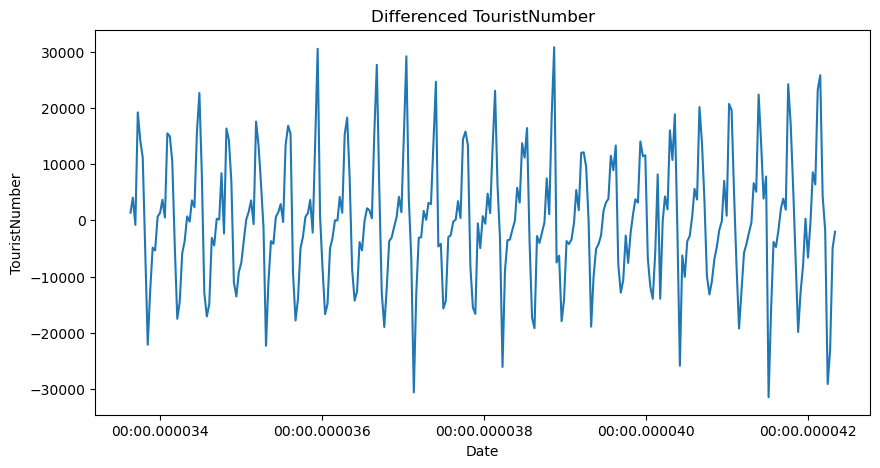

In [5]:

# Check for stationarity on the original series
result = adfuller(df['TouristNumber'].dropna())
print('ADF Statistic (Original):', result[0])
print('p-value (Original):', result[1])

# Differencing the data
df['TouristNumber_diff'] = df['TouristNumber'].diff().dropna()

# Check for stationarity on the differenced series
result = adfuller(df['TouristNumber_diff'].dropna())
print('ADF Statistic (Differenced):', result[0])
print('p-value (Differenced):', result[1])

# Plot the differenced data
plt.figure(figsize=(10, 5))
plt.plot(df['TouristNumber_diff'])
plt.title('Differenced TouristNumber')
plt.xlabel('Date')
plt.ylabel('TouristNumber')
plt.show()


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index b

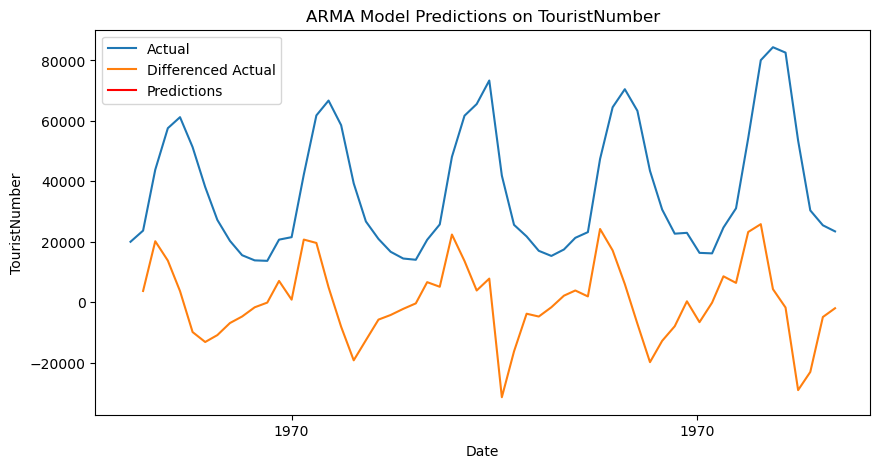

In [11]:
# Split the data
train_size = int(0.8 * len(df))
train_data = df['TouristNumber'][:train_size]
test_data = df['TouristNumber'][train_size:]

# Differencing for ARMA Model
train_data_diff = train_data.diff().dropna()
test_data_diff = test_data.diff().dropna()

# Fit the ARMA model
model = ARIMA(train_data_diff, order=(1, 0, 1))  # Example ARMA(1, 1)
model_fit = model.fit()

# Make predictions
start = len(train_data_diff)
end = len(train_data_diff) + len(test_data_diff) - 1
predictions = model_fit.predict(start=start, end=end)

# Reconstruct the original predictions
predictions_series = pd.Series(predictions, index=test_data_diff.index)

# Plot the results
plt.figure(figsize=(10, 5))

# Plot actual data
plt.plot(df.index[train_size:], df['TouristNumber'][train_size:], label='Actual')

# Plot differenced actual data
# Differenced data for the actual values
differenced_actual = df['TouristNumber'].diff().dropna()
plt.plot(differenced_actual.index[train_size:], differenced_actual[train_size:], label='Differenced Actual')

# Plot predictions
plt.plot(predictions_series.index, predictions_series, label='Predictions', color='red')

plt.legend()
plt.title('ARMA Model Predictions on TouristNumber')
plt.xlabel('Date')
plt.ylabel('TouristNumber')
plt.show()


In [17]:
print(type(test_data))


<class 'pandas.core.series.Series'>


In [19]:
predictions = pd.Series(predictions)


In [22]:
print(aligned_actual.head())
print(aligned_predicted.head())


Series([], Name: TouristNumber, dtype: int64)
Series([], Name: predicted_mean, dtype: float64)


In [23]:
print("Length of test_data:", len(test_data))
print("Length of predictions:", len(predictions))


Length of test_data: 58
Length of predictions: 57


In [28]:
# Align predictions with test_data index
predictions = pd.Series(predictions, index=test_data.index)


In [25]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1
start,end

(230, 287)

C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


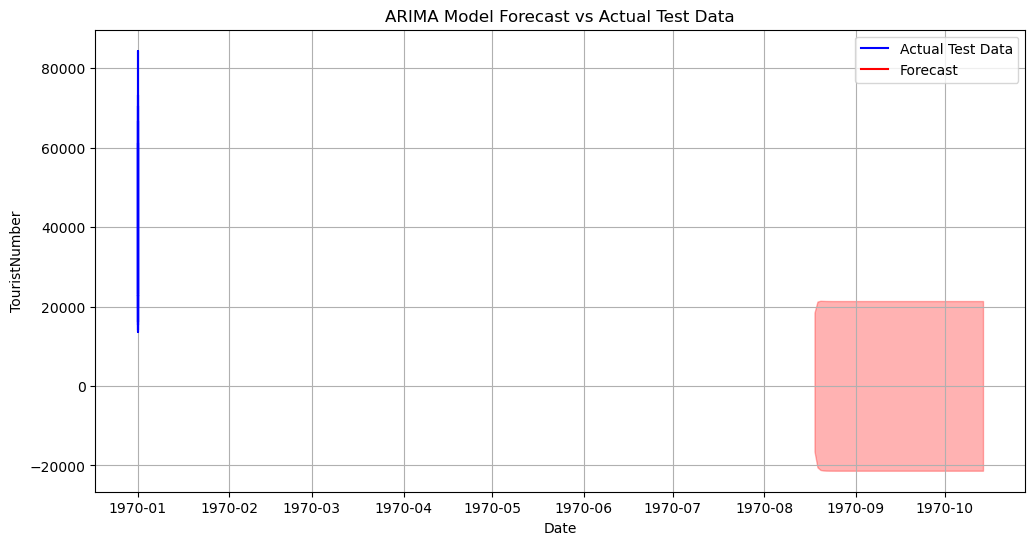

In [31]:
# Forecast future values
forecast_steps = len(test_data)
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Convert forecast mean to a DataFrame to align with test_data
forecast_index = test_data.index
forecast_series = pd.Series(forecast_mean, index=forecast_index)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot actual test data
plt.plot(test_data.index, test_data, label='Actual Test Data', color='blue')

# Plot forecast mean
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red')

# Plot confidence intervals
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)

plt.legend()
plt.title('ARIMA Model Forecast vs Actual Test Data')
plt.xlabel('Date')
plt.ylabel('TouristNumber')
plt.grid(True)
plt.show()

In [32]:
# Print model diagnostics
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:          TouristNumber   No. Observations:                  229
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2405.319
Date:                Mon, 29 Jul 2024   AIC                           4818.639
Time:                        10:29:42   BIC                           4832.374
Sample:                             0   HQIC                          4824.180
                                - 229                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.0786   1301.859      0.020      0.984   -2525.517    2577.674
ar.L1          0.3692      0.107      3.460      0.001       0.160       0.578
ma.L1          0.2849      0.111      2.557      0.0

In [33]:
# Example of tuning ARIMA parameters
model = ARIMA(train_data, order=(2, 1, 2))  # Adjust parameters (p, d, q) as needed
model_fit = model.fit()


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxi

In [34]:
# Apply differencing consistently
df['TouristNumber_diff'] = df['TouristNumber'].diff().dropna()

# Re-split the data
train_size = int(0.8 * len(df))
train_data = df['TouristNumber_diff'][:train_size]
test_data = df['TouristNumber_diff'][train_size:]


C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\71591\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index b

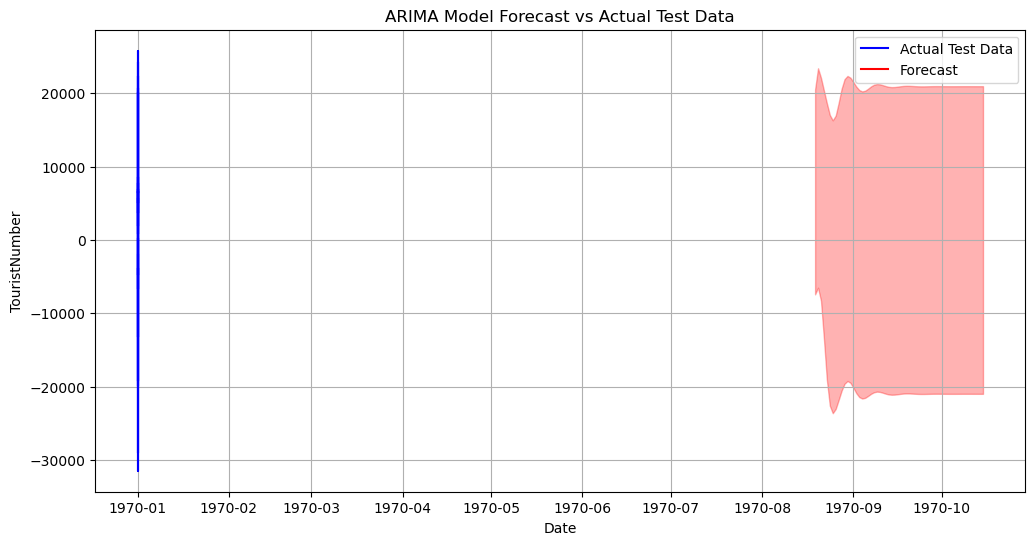

In [35]:
# Re-fit the model
model = ARIMA(train_data, order=(2, 1, 2))  # Adjust parameters as needed
model_fit = model.fit()

# Forecast future values
forecast_steps = len(test_data)
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Convert forecast mean to a DataFrame
forecast_index = test_data.index
forecast_series = pd.Series(forecast_mean, index=forecast_index)

# Plot the updated results
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual Test Data', color='blue')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='red')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.legend()
plt.title('ARIMA Model Forecast vs Actual Test Data')
plt.xlabel('Date')
plt.ylabel('TouristNumber')
plt.grid(True)
plt.show()
